In [18]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.0.0-rc1
2.2.4-tf


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 69us/sample - loss: 225370601686489627178827776.0000 - val_loss: 223652774566439946289152.0000
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 118176444281804602474496.0000 - val_loss: 52281432425126512558080.0000
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: 27625116173538334605312.0000 - val_loss: 12221385657698016559104.0000
Epoch 4/20
11610/11610 [==============================] - 0s 41us/sample - loss: 6457679211900040118272.0000 - val_loss: 2856883191238448119808.0000
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 1509556868842716135424.0000 - val_loss: 667830203755981176832.0000
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 352876553215479382016.0000 - val_loss: 156113164511263850496.0000
Epoch 7/20
11610/11610 [========================

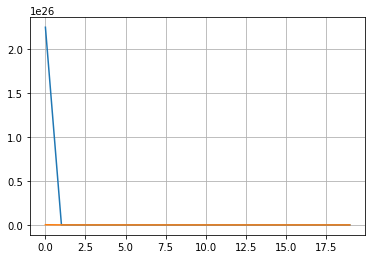

In [23]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

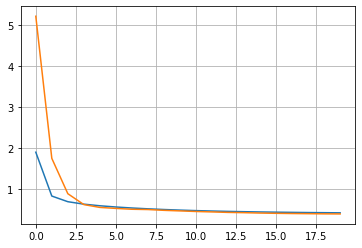

# Dane zawsze muszą być przeskalowane